## Predicting heart disease using machine learning

## This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation
1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved
    
exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\ashu\Downloads\heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## data exploration


Data Exploration (exploratory data analysis or EDA)¶
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    What question(s) are you trying to solve?
    What kind of data do we have and how do we treat different types?
    What's missing from the data and how do you deal with it?
    Where are the outliers and why should you care about them?
    How can you add, change or remove features to get more out of your data?

In [4]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

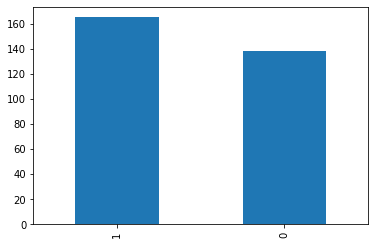

In [6]:
df['target'].value_counts().plot(kind= "bar")

In [7]:
df['cp']


0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

<AxesSubplot:xlabel='cp'>

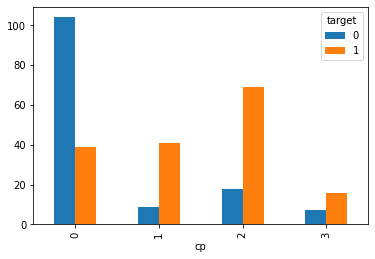

In [8]:
pd.crosstab(df.cp, df.target).plot.bar()

In [9]:
corr_matrix = df.corr()

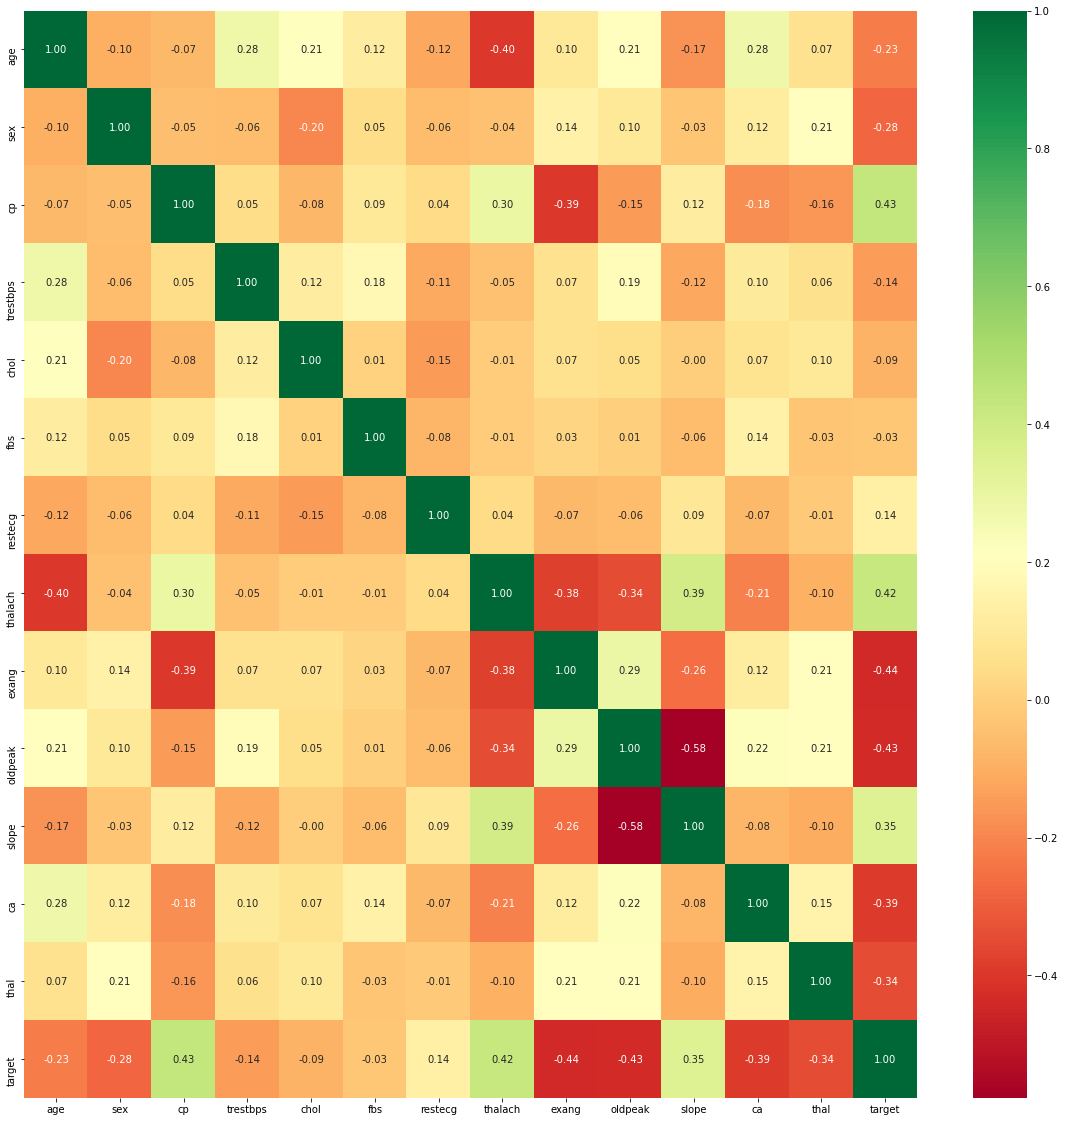

In [10]:
fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap="RdYlGn")

## Modeling

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#split data
np.random.seed(4)
x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [13]:
models= {"logistic_regression": LogisticRegression(),
                   "RandomForestClassifier": RandomForestClassifier(),
                   "KNN":KNeighborsClassifier()}

In [14]:
def fit_and_score( models, x_train, x_test, y_train, y_test):
    
    np.random.seed(40)
    
    model_score= {}
    
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [15]:
model_score = fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\ashu\ml-projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
model_score

{'logistic_regression': 0.9016393442622951,
 'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.5737704918032787}

In [17]:
model_compare = pd.DataFrame(model_score, index=['Accuracy'])

In [18]:
model_compare


,logistic_regression,RandomForestClassifier,KNN
Accuracy,0.901639,0.836066,0.57377


<AxesSubplot:>

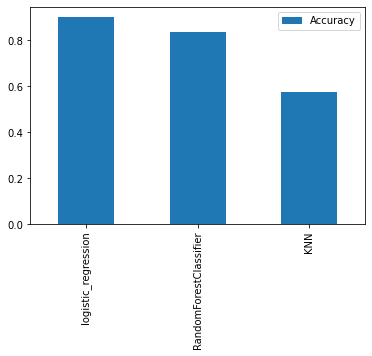

In [19]:
model_compare.T.plot.bar()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
logisticRegression = LogisticRegression()
logisticRegression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

clf_grid = {"n_estimators" : np.arange( 10, 1000, 50),
           "max_depth" : [None, 3 ,5,10],
           "min_samples_split": np.arange( 2, 20, 2),
           "min_samples_leaf": np.arange(1,20,2)}
            

In [30]:
np.random.seed(43)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions= log_reg_grid,
                               cv=5 , n_iter=20 , verbose=True)

rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_score_

0.814455782312925

In [42]:
np.random.seed(42)

rs_clf = RandomizedSearchCV(RandomForestClassifier(),param_distributions= clf_grid,
                           cv = 5, n_iter=20, verbose=True)

In [43]:
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_clf.best_score_


0.8224489795918368

In [45]:
rs_clf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [56]:
log_reg_grid = {"C" : np.logspace(-4,4,40),
                "solver" : ["liblinear"]}

In [57]:
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid,
                         cv=5,verbose=2,n_jobs=3)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01....89652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [58]:
gs_log_reg.best_score_

0.814455782312925

In [55]:
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [60]:
y_preds = gs_log_reg.predict(x_test)

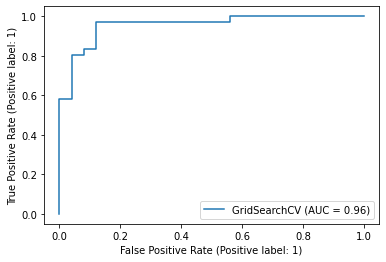

In [61]:
# import ROC curve function
# plot roc curve and calculate AUC matrics

plot_roc_curve(gs_log_reg, x_test, y_test) 

In [65]:
con_matrics = confusion_matrix(y_test, y_preds)

In [63]:
sns

<module 'seaborn' from 'C:\\Users\\ashu\\ml-projects\\heart-disease-project\\env\\lib\\site-packages\\seaborn\\__init__.py'>

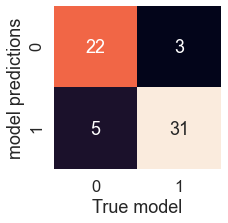

In [71]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize =  (3,3))

    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True model")
    plt.ylabel("model predictions")
    
plot_conf_mat(y_test, y_preds)

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Calculate evaluation metrics using cross-validation
    calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().
    

In [73]:
gs_log_reg.best_params_

{'C': 88.86238162743408, 'solver': 'liblinear'}

In [75]:
clf = LogisticRegression(C= 88.86238162743408, solver= 'liblinear')

In [82]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.831584699453552

In [85]:
cv_pre = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8239892427392427

In [84]:
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8848484848484848

In [83]:
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8521267621267622

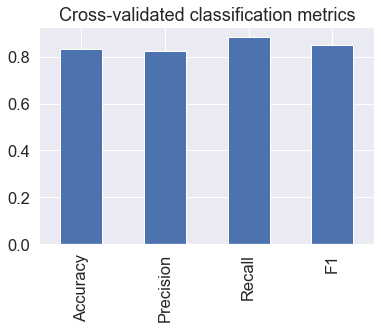

In [87]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])


cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [89]:
gs_log_reg.best_params_

{'C': 88.86238162743408, 'solver': 'liblinear'}

In [90]:
clf = LogisticRegression(C = 88.86238162743408, solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=88.86238162743408, solver='liblinear')

In [91]:
clf.coef_

array([[-0.00527484, -1.65581809,  0.80817813, -0.02155065, -0.00291804,
         0.21022688,  0.51665876,  0.01782722, -0.78581689, -0.6246896 ,
         0.65324762, -0.74590565, -0.76268838]])

In [92]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005274842820770686,
 'sex': -1.6558180894871122,
 'cp': 0.8081781308545138,
 'trestbps': -0.02155065301057585,
 'chol': -0.0029180404234438956,
 'fbs': 0.21022687700655227,
 'restecg': 0.5166587571327546,
 'thalach': 0.01782722204425872,
 'exang': -0.7858168902725351,
 'oldpeak': -0.6246895958513883,
 'slope': 0.6532476203324109,
 'ca': -0.7459056522227838,
 'thal': -0.7626883809964466}

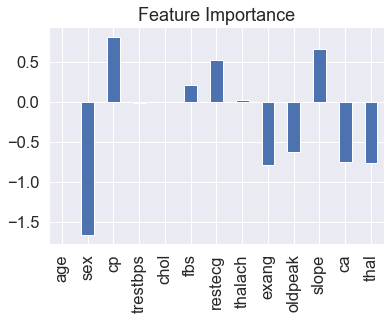

In [93]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
